In [1]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df =pd.read_csv('churn_modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df.duplicated('CustomerId').sum()

0

In [8]:
df=df.set_index('CustomerId')

In [10]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [12]:
df.replace({'Geography':{'France':2,'Germany':1,'Spain':0}},   inplace=True)

In [13]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [14]:
df.replace({'Gender':{'Male':0, 'Female':1}}, inplace=True)

In [17]:
df['NumOfProducts'].value_counts()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [18]:
df.replace({'NumOfProducts':{1:0,2:1,3:1,4:1}}, inplace=True)

In [19]:
df['HasCrCard'].value_counts()

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

In [20]:
df['IsActiveMember'].value_counts()

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

In [22]:
df.loc[(df['Balance']==0),'Exited'].value_counts()

Exited
0    3117
1     500
Name: count, dtype: int64

In [24]:
df['Zero Balance']=np.where(df['Balance']>0,1,0)

<AxesSubplot:>

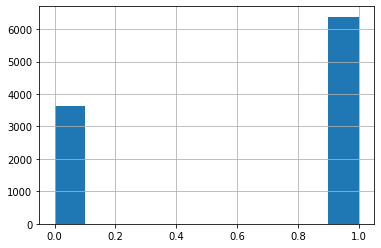

In [25]:
df['Zero Balance'].hist()

In [29]:
df.groupby(['Exited','Geography']).count()

RowNumber  Surname  CreditScore  Gender   Age  Tenure   
Exited Geography                                                          
0      0               2064     2064         2064    2064  2064    2064  \
       1               1695     1695         1695    1695  1695    1695   
       2               4204     4204         4204    4204  4204    4204   
1      0                413      413          413     413   413     413   
       1                814      814          814     814   814     814   
       2                810      810          810     810   810     810   

                  Balance  NumOfProducts  HasCrCard  IsActiveMember   
Exited Geography                                                      
0      0             2064           2064       2064            2064  \
       1             1695           1695       1695            1695   
       2             4204           4204       4204            4204   
1      0              413            413        413             413   
       1              814            814        814             814   
       2              810            810        810             810   

                  EstimatedSalary  Zero Balance  
Exited Geography                                 
0      0                     2064          2064  
       1                     1695          1695  
       2                     4204          4204  
1      0                      413           413  
       1                      814           814  
       2                      810           810

In [30]:
df.columns

Index(['RowNumber', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Zero Balance'],
      dtype='object')

In [34]:
x=df.drop(['Surname','Exited'],axis =1)

In [35]:
y=df['Exited']

In [36]:
x.shape,y.shape

((10000, 12), (10000,))

In [37]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

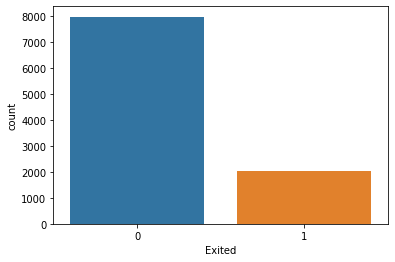

In [39]:
sns.countplot(x='Exited',data =df);

# random under sampling

In [41]:
from imblearn.under_sampling import RandomUnderSampler

In [42]:
rus=RandomUnderSampler(random_state=2529)

In [43]:
x_rus,y_rus=rus.fit_resample(x,y)

In [44]:
x_rus.shape,y_rus.shape,x.shape,y.shape

((4074, 12), (4074,), (10000, 12), (10000,))

In [45]:
y.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [46]:
y_rus.value_counts()

Exited
0    2037
1    2037
Name: count, dtype: int64

<AxesSubplot:ylabel='Frequency'>

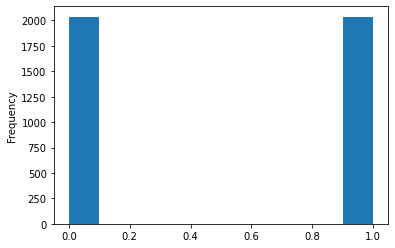

In [47]:
y_rus.plot(kind='hist')

# Random over Sampling

In [49]:
from imblearn.over_sampling import RandomOverSampler

In [50]:
ros =RandomOverSampler(random_state=2529)

In [51]:
x_ros,y_ros=ros.fit_resample(x,y)

In [52]:
x_ros.shape,y_ros.shape,x.shape,y.shape

((15926, 12), (15926,), (10000, 12), (10000,))

In [53]:
y.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

<AxesSubplot:ylabel='Frequency'>

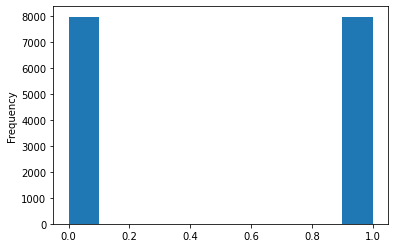

In [55]:
y_ros.plot(kind='hist')

In [56]:
#train test split
from sklearn.model_selection import train_test_split

In [57]:
#split Orginal Data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=25)

In [59]:
#split Random Under Sample Data
x_train_rus,x_test_rus,y_train_rus,y_test_rus = train_test_split(x_rus,y_rus,test_size=0.3,random_state=30)

In [60]:
#split Random over Sample data
x_train_ros,x_test_ros,y_train_ros,y_test_ros = train_test_split(x_ros,y_ros,test_size=0.3,random_state=30)

# standardize Features

In [64]:
from sklearn.preprocessing import StandardScaler

In [69]:
sc=StandardScaler()

In [70]:
x_train[['CreditScore','Age','Tenure','Balance','EstimatedSalary']] =sc.fit_transform(x_train[['CreditScore','Age','Tenure','Balance','EstimatedSalary']])

In [71]:
x_test[['CreditScore','Age','Tenure','Balance','EstimatedSalary']] =sc.fit_transform(x_test[['CreditScore','Age','Tenure','Balance','EstimatedSalary']])

In [72]:
x_train_rus[['CreditScore','Age','Tenure','Balance','EstimatedSalary']] =sc.fit_transform(x_train_rus[['CreditScore','Age','Tenure','Balance','EstimatedSalary']])

In [73]:
x_test_rus[['CreditScore','Age','Tenure','Balance','EstimatedSalary']] =sc.fit_transform(x_test_rus[['CreditScore','Age','Tenure','Balance','EstimatedSalary']])

In [74]:
x_train_ros[['CreditScore','Age','Tenure','Balance','EstimatedSalary']] =sc.fit_transform(x_train_ros[['CreditScore','Age','Tenure','Balance','EstimatedSalary']])

In [75]:
x_test_ros[['CreditScore','Age','Tenure','Balance','EstimatedSalary']] =sc.fit_transform(x_test_ros[['CreditScore','Age','Tenure','Balance','EstimatedSalary']])

In [76]:
##Support vector Machine Clssifier
from sklearn.svm import SVC

In [77]:
svc =SVC()

In [78]:
svc.fit(x_train,y_train)

SVC()

In [79]:
y_pred =svc.predict(x_test)

In [80]:
#model Accuracy
from sklearn.metrics import confusion_matrix,classification_report

In [81]:
confusion_matrix(y_test,y_pred)

array([[2419,    0],
       [ 581,    0]], dtype=int64)

In [82]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      2419
           1       0.00      0.00      0.00       581

    accuracy                           0.81      3000
   macro avg       0.40      0.50      0.45      3000
weighted avg       0.65      0.81      0.72      3000



C:\Users\Siddhi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Siddhi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Siddhi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [83]:
#Hyperparamete tunning
from sklearn.model_selection import GridSearchCV

In [86]:
param_grid ={'C':[0.1,1,10],
            'gamma':[1,0.1,0.01],
            'kernel':['rbf'],
            'class_weight':['balanced']}

In [89]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2, cv=2)
grid.fit(x_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.4s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.4s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.4s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.3s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.1s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [90]:
print(grid.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=1)


In [93]:
grid_predictions =grid.predict(x_test)

In [94]:
confusion_matrix(y_test,grid_predictions)

array([[2419,    0],
       [ 581,    0]], dtype=int64)

In [97]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      2419
           1       0.00      0.00      0.00       581

    accuracy                           0.81      3000
   macro avg       0.40      0.50      0.45      3000
weighted avg       0.65      0.81      0.72      3000



C:\Users\Siddhi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Siddhi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Siddhi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [98]:
svc_rus =SVC()

In [99]:
svc_rus.fit(x_train_rus,y_train_rus)

SVC()

In [100]:
y_pred_rus =svc_rus.predict(x_test_rus)

In [101]:
confusion_matrix(y_test_rus,y_pred_rus)

array([[425, 171],
       [427, 200]], dtype=int64)

In [102]:
print(classification_report(y_test_rus,y_pred_rus))

              precision    recall  f1-score   support

           0       0.50      0.71      0.59       596
           1       0.54      0.32      0.40       627

    accuracy                           0.51      1223
   macro avg       0.52      0.52      0.49      1223
weighted avg       0.52      0.51      0.49      1223



In [103]:
grid_rus = GridSearchCV(SVC(),param_grid,refit=True,verbose=2, cv=2)
grid_rus.fit(x_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.6s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.6s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.5s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.4s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.5s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.1s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [104]:
grid_predictions_rus =grid_rus.predict(x_test_rus)

In [106]:
confusion_matrix(y_test_rus,grid_predictions_rus)

array([[596,   0],
       [167, 460]], dtype=int64)

In [107]:
print(classification_report(y_test_rus,grid_predictions_rus))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88       596
           1       1.00      0.73      0.85       627

    accuracy                           0.86      1223
   macro avg       0.89      0.87      0.86      1223
weighted avg       0.89      0.86      0.86      1223

